# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 3:**

*   "Unidades 5 y 6"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 5 y 6 en un problema real asociado a la determinación del color de los granos de café mediante la medición de atributos característicos.

## Actividades

1. Descargar el conjunto de CoffeeRatings.csv1, para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

2. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

3. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

4. Realizar la predicción del atributo Color utilizando Random Forest analizando los parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

# 1) Análisis descriptivo

## Procedimientos previos

### Paquetes y Librerías

In [238]:
# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sns

# Balance
from imblearn.over_sampling import SMOTE

# Procesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

# Clasificadores
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Valdación
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Impresiones del RandomForest
from sklearn.tree import plot_tree, export_graphviz
import graphviz

#Warnings
import warnings
warnings.simplefilter('ignore')

Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### DataFrame

In [49]:
# Path 1 - Referenciado a la carpeta de Drive
data = pd.read_csv('/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP3/CoffeeRatings.csv', sep=';', engine='python')
# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('CoffeeRatings.csv', sep=';', engine='python')

In [50]:
data

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [51]:
data.head(3)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green


### Análisis exploratorio

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [53]:
data.describe().round(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,623.73,615.58,611.68,617.12,610.33,611.28,191.76,157.64,8.23,6675.44
std,273.72,274.25,263.87,274.48,276.37,276.30,257.58,203.44,5.13,3007.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,717.00,708.00,683.00,717.00,708.00,692.00,100.00,100.00,1.00,7792.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,775.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8325.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


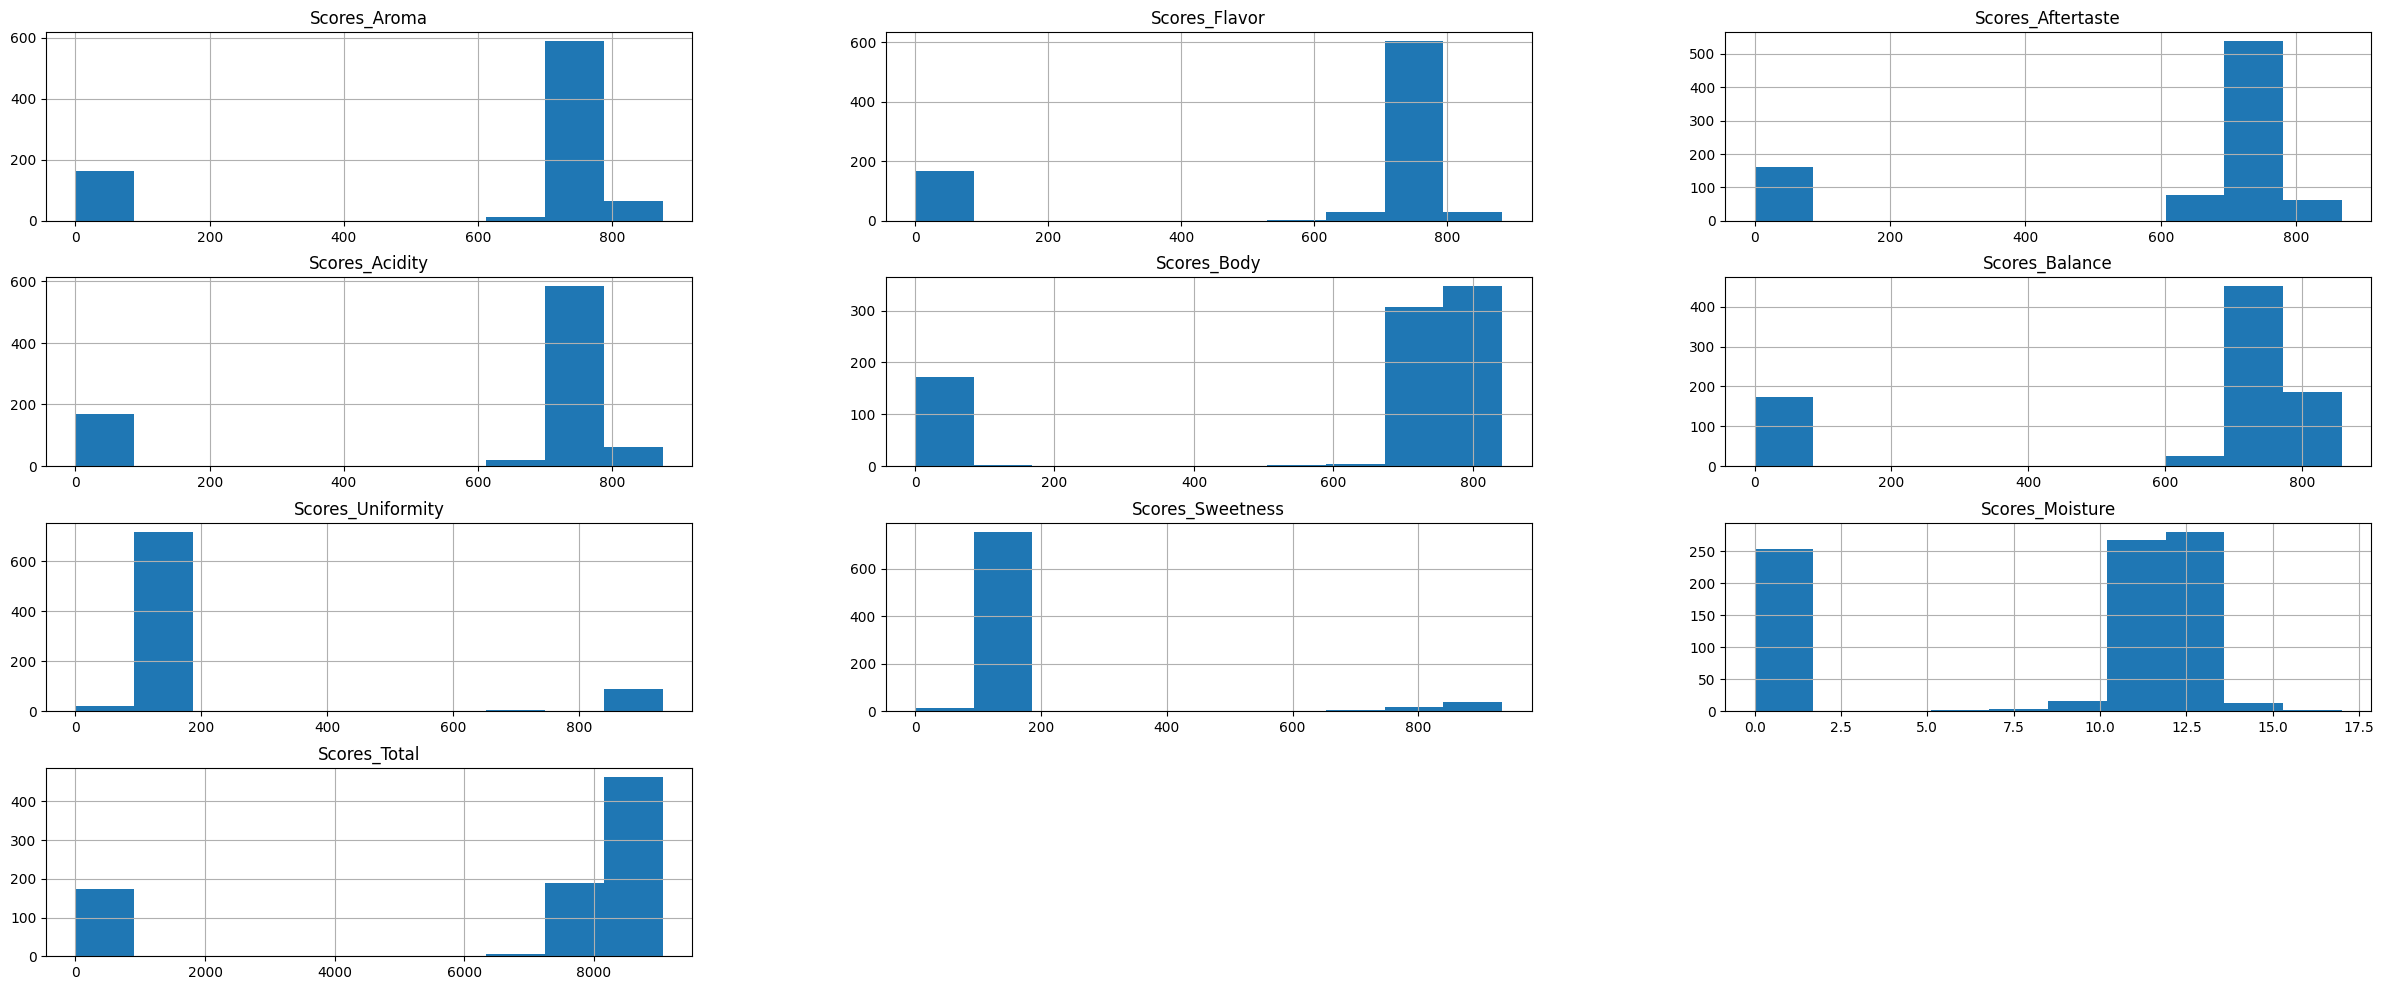

In [54]:
data.hist(figsize=(30,12))
plt.show()

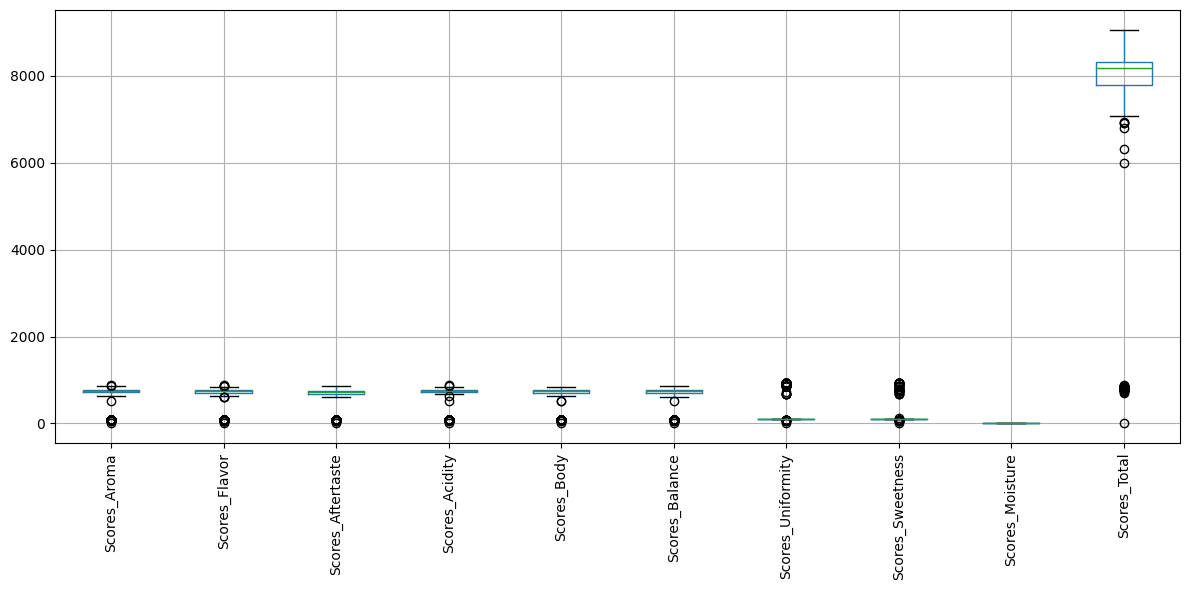

In [55]:
# Boxplot de los atributos a modo exploratorio
plt.figure(figsize=(12, 6))
data.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

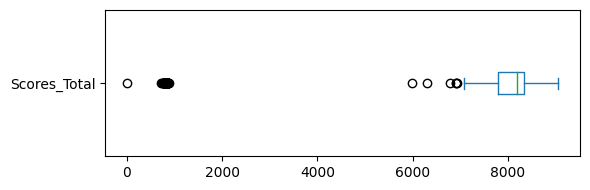

In [57]:
# Boxplot por atributo individual
# Para ver de más cerca las columnas con menos rango
target = 'Scores_Total'
plt.figure(figsize=(6, 2))
data[target].plot(kind='box', vert=False)
plt.tight_layout()
plt.show()

## Procesamiento del dataframe

### Nombres de atributos

In [58]:
# Renombrar las columnas sin la palabra "Scores_"
new_names = {col: col.replace('Scores_', '') for col in data.columns}
data.rename(columns=new_names, inplace=True)

In [59]:
data.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Sweetness', 'Moisture', 'Total', 'Color'],
      dtype='object')

### Variable objetivo

In [60]:
data['Color'].value_counts()

Green           681
Bluish-Green     96
Blue-Green       58
Name: Color, dtype: int64

Este desbalance puede afectar el rendimiento de los modelos y producir un sesgo hacia la clase dominante. Se aplicará posteriormente la técnica SMOTE para resolverlo. Ver sección correspondiente al balance.

### Análisis de datos nulos o faltantes

In [61]:
data.isna().sum()

Aroma         0
Flavor        0
Aftertaste    0
Acidity       0
Body          0
Balance       0
Uniformity    0
Sweetness     0
Moisture      0
Total         0
Color         0
dtype: int64

Se observa que no existen valores nulos pero hay registros con ausencia de datos (ceros). Se analiza si se descartan para el análisis o se imputan con algún valor de tendencia central.

In [62]:
zero_counts = (data == 0).sum()
print(zero_counts)

Aroma           1
Flavor          1
Aftertaste      1
Acidity         1
Body            1
Balance         1
Uniformity      1
Sweetness       1
Moisture      112
Total           1
Color           0
dtype: int64


In [63]:
# Filtrar registros con algún valor igual a cero
data_with_zeros = data.loc[(data == 0).any(axis=1)]
data_with_zeros

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
10,733,758,717,758,742,758,100,100,0,8242,Green
11,733,742,733,733,75,767,100,100,0,8175,Green
22,783,808,775,808,792,775,100,100,0,8533,Green
23,80,792,792,808,783,775,100,100,0,8533,Green
26,775,783,775,808,80,775,100,100,0,850,Green
...,...,...,...,...,...,...,...,...,...,...,...
774,767,733,717,667,717,742,933,667,0,7683,Green
777,775,758,733,758,508,783,100,775,0,7875,Blue-Green
778,75,767,775,775,517,525,100,842,0,7808,Blue-Green
780,767,767,783,758,783,783,100,100,0,8442,Blue-Green


Por la distribución y cantidad de registros con valor cero, se descarta su eliminación y se aplicará una tecnica de imputación por un valor de tendencia central.

In [ ]:
# Eliminar registros que contienen al menos un cero en alguna característica
# data_without_zeros = data[(data != 0).all(axis=1)]
# data_without_zeros

In [64]:
# Imputación por la mediana
data['Moisture'] = data['Moisture'].replace(0, data['Moisture'].median())

In [65]:
data.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,623.73,615.58,611.68,617.12,610.33,611.28,191.76,157.64,9.71,6675.44
std,273.72,274.25,263.87,274.48,276.37,276.30,257.58,203.44,4.01,3007.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,717.00,708.00,683.00,717.00,708.00,692.00,100.00,100.00,11.00,7792.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,775.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8325.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


### Datos duplicados

In [66]:
duplicated_rows = data.duplicated()
print("Hay filas duplicadas.") if duplicated_rows.any() else print("No hay filas duplicadas.")

No hay filas duplicadas.


## Visualizaciones

### Cantidad de registros por tipo

In [67]:
data['Color'].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

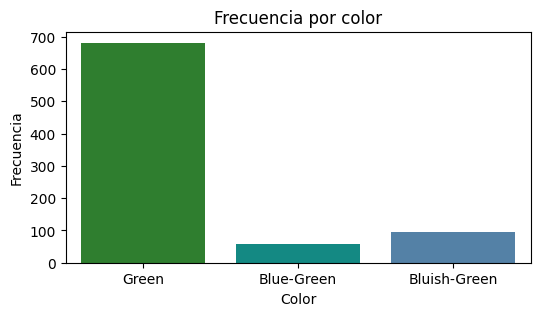

In [68]:
colores = {'Green': '#228B22', 'Blue-Green': '#009D94', 'Bluish-Green': '#4682b4'}
plt.figure(figsize=(6, 3))
sns.countplot(x='Color', data=data, palette=colores)
plt.title('Frecuencia por color')
plt.xlabel('Color'), plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='center')
plt.show()

### Histogramas

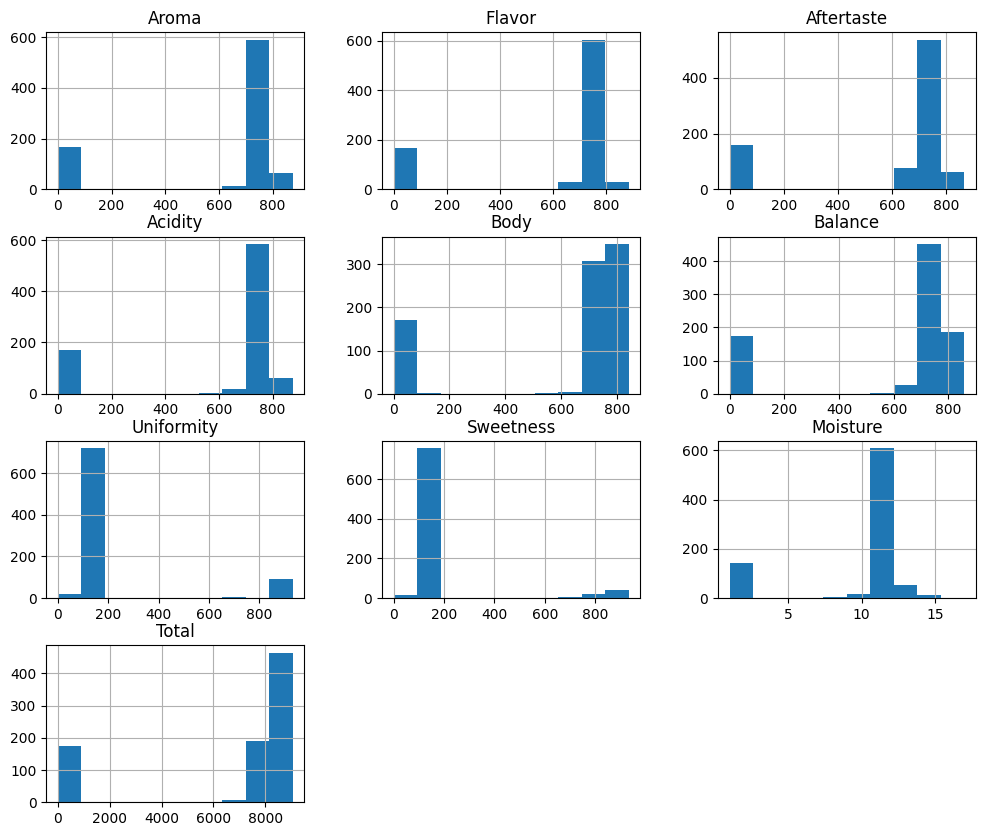

In [69]:
data.hist(figsize=(12,10))
plt.show()

### Boxplots

In [70]:
#@title Boxplot Matrix
continuous_features = []
for feat in data.columns:
    if data[feat].nunique() > 2:
        continuous_features.append(feat)

num_cols = 3
num_rows = (len(continuous_features) + 1) // num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

for i, feature in enumerate(continuous_features):
    row = i // num_cols + 1
    col = i % num_cols + 1

    fig.add_trace(go.Box(x=data[feature], name = ' '), row=row, col=col)

    fig.update_yaxes(title_text = ' ', row=row, col=col)
    fig.update_xaxes(title_text= feature, row=row, col=col)
    fig.update_layout(
        title=f'<b>Boxplot Matrix<br> <sup> Continuous Features</sup></b>',
        showlegend=False, yaxis=dict(tickangle=-90)
    )

fig.update_layout(
    height=150 * num_rows,
    width=1200,
    margin=dict(t=100, l=80),
    template= 'simple_white'
)
fig.show()

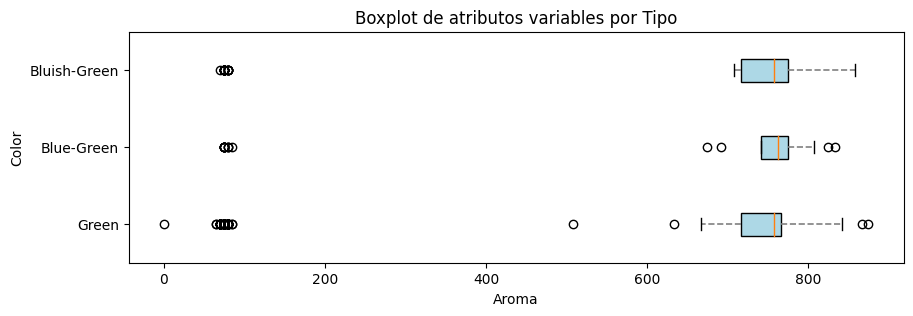

In [71]:
#@title Boxplots de atributos por color

# 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
# 'Uniformity', 'Sweetness', 'Moisture', 'Total', 'Color'
target = 'Aroma'

plt.figure(figsize=(10, 3))
boxplot = plt.boxplot([data[data['Color'] == label][target] for label in data['Color'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de las cajas (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(data['Color'].unique()) + 1), data['Color'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Color')
plt.title('Boxplot de atributos variables por Tipo')
plt.show()

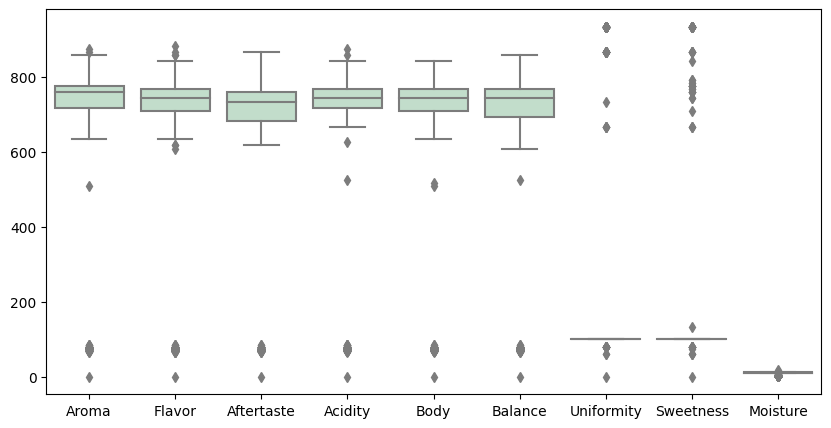

In [72]:
#@title Boxplots por categorías

plt.figure(figsize=(10,5))
sns.boxplot(data = data.drop('Total', axis = 1), color='#BDE2C9')
plt.xticks(rotation=0)
plt.show()

## Valores atípicos

In [107]:
df = data.copy()

In [108]:
df.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,623.73,615.58,611.68,617.12,610.33,611.28,191.76,157.64,9.71,6675.44
std,273.72,274.25,263.87,274.48,276.37,276.30,257.58,203.44,4.01,3007.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,717.00,708.00,683.00,717.00,708.00,692.00,100.00,100.00,11.00,7792.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,775.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8325.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


In [97]:
# # Eliminación manual de valores atípicos
# df = df[(df['Aroma'] < 900) & (df['Aroma'] > 600)]
# df = df[(df['Flavor'] < 900) & (df['Flavor'] > 600)]
# df = df[(df['Aftertaste'] > 600)]
# df = df[(df['Acidity'] < 900) & (df['Flavor'] > 600)]
# df = df[(df['Body'] > 600)]
# df = df[(df['Balance'] > 600)]
# df = df[(df['Uniformity'] < 100) & (df['Aroma'] > 20)]
# df = df[(df['Sweetness'] < 150) & (df['Aroma'] > 50)]
# df = df[(df['Moisture'] < 14) & (df['Aroma'] > 7)]
# df = df[(df['Total'] < 8500) & (df['Total'] > 7000)]

In [98]:
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
244,792,758,717,758,733,717,80,80,11,7558,Green


Se observa que prácticamente todos los registros individuales contienen valores considerados atípicos en alguno de los atributos. El filtrado de ellos hace que casi todos ellos queden excluídos del conjunto, por lo que se omite la eliminación.

## Estandarización

### Estandarización Z-score (Excluyendo variable categórica)

In [109]:
df_sub = df.drop('Color', axis=1)
scaler_z = StandardScaler()
X_scaled = scaler_z.fit_transform(df_sub)
# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
# Mantenemos las columnas excluídas del estandarizado
df_std['Color'] = df['Color']

In [110]:
df_std.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.28,-2.25,-2.32,-2.25,-2.21,-2.21,-0.74,-0.78,-2.17,-2.22
25%,0.34,0.34,0.27,0.36,0.35,0.29,-0.36,-0.28,0.32,0.37
50%,0.49,0.46,0.46,0.46,0.48,0.47,-0.36,-0.28,0.32,0.50
75%,0.55,0.55,0.55,0.55,0.57,0.56,-0.36,-0.28,0.57,0.55
max,0.92,0.98,0.97,0.94,0.84,0.89,2.88,3.81,1.82,0.79


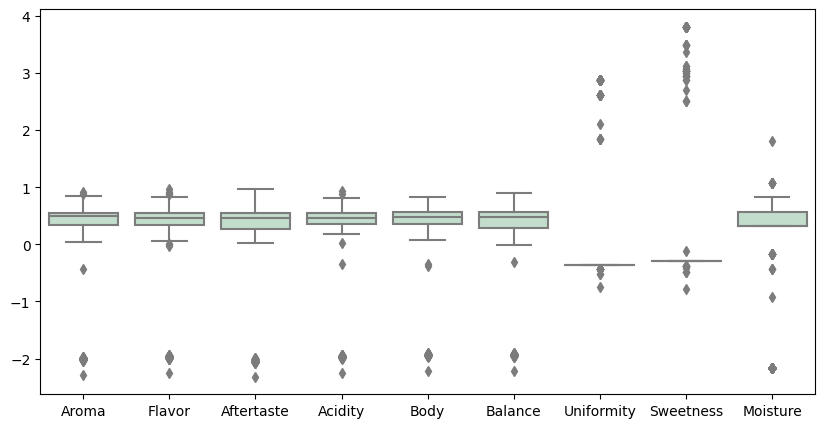

In [111]:
#@title Boxplots por categorías
plt.figure(figsize=(10,5))
sns.boxplot(data = df_std.drop('Total', axis = 1), color='#BDE2C9')
plt.xticks(rotation=0)
plt.show()

### Estandarización Min-Max (Excluyendo variable categórica)

In [112]:
df_sub = df.drop('Color', axis=1)
scaler_mm = MinMaxScaler()
X_scaled = scaler_mm.fit_transform(df_sub)
# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std2 = pd.DataFrame(X_scaled, columns=df_sub.columns)
# Mantenemos las columnas excluídas del estandarizado
df_std2['Color'] = df['Color']

In [113]:
df_std2.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,0.71,0.70,0.71,0.71,0.72,0.71,0.21,0.17,0.54,0.74
std,0.31,0.31,0.30,0.31,0.33,0.32,0.28,0.22,0.25,0.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.82,0.80,0.79,0.82,0.84,0.81,0.11,0.11,0.62,0.86
50%,0.87,0.84,0.85,0.85,0.88,0.86,0.11,0.11,0.62,0.90
75%,0.89,0.87,0.87,0.88,0.91,0.89,0.11,0.11,0.69,0.92
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


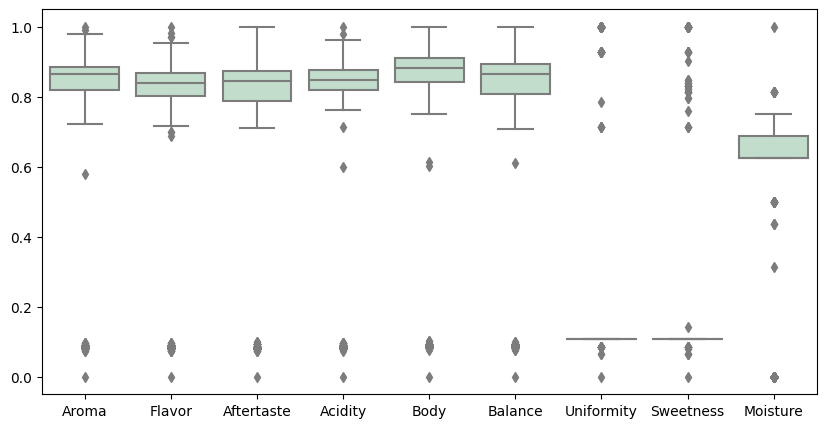

In [114]:
#@title Boxplots por categorías
plt.figure(figsize=(10,5))
sns.boxplot(data = df_std2.drop('Total', axis = 1), color='#BDE2C9')
plt.xticks(rotation=0)
plt.show()

Para la continuidad del trabajo se optará por el escalado min-max por estos motivos:

* Sensibilidad a Outliers: El escalado min-max es menos sensible a los valores atípicos en comparación con el z-score.

* Preservación de la Forma de la Distribución: El escalado min-max conserva la forma de la distribución original, ya que simplemente ajusta y escala los datos dentro de un rango específico.

* Requisitos del Modelo: los modelos que debo implementar a continuación, como las Máquinas de Soporte Vectorial (SVM) con kernel no lineal, pueden ser sensibles a la escala y pueden beneficiarse de la escala min-max, que mantiene la información relativa de las características en el rango original.

## Matriz de correlación

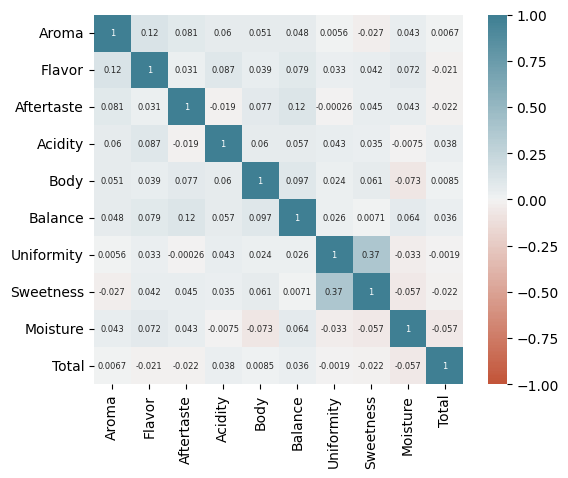

In [116]:
corr = df_std2.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

## Codificación de la variable "Color"

In [281]:
data_encoded = pd.get_dummies(df_std, columns=['Color'], drop_first=True)

In [282]:
data_encoded = pd.get_dummies(df_std2, columns=['Color'], drop_first=False)

In [283]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aroma               835 non-null    float64
 1   Flavor              835 non-null    float64
 2   Aftertaste          835 non-null    float64
 3   Acidity             835 non-null    float64
 4   Body                835 non-null    float64
 5   Balance             835 non-null    float64
 6   Uniformity          835 non-null    float64
 7   Sweetness           835 non-null    float64
 8   Moisture            835 non-null    float64
 9   Total               835 non-null    float64
 10  Color_Blue-Green    835 non-null    uint8  
 11  Color_Bluish-Green  835 non-null    uint8  
 12  Color_Green         835 non-null    uint8  
dtypes: float64(10), uint8(3)
memory usage: 67.8 KB


Se analiza la posibilidad de codificar el atributo color a modo esperimental. Los resultados no ameritan su aplicación

# Conjuntos de Entrenamiento y Prueba

## Separación de conjuntos X e y

In [117]:
# Separación de variables explicativas y variables objetivo
X = df_std2.drop(['Color'], axis=1).copy()
y = df_std2[['Color']].copy()

In [120]:
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 10), (167, 10), (668, 1), (167, 1))

## DataFrame de Entrenamiento y Prueba

In [122]:
# Crear un nuevo DataFrame para TRAIN y para TEST
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['Color'] = y['Color']

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Color'] = y['Color']

In [125]:
df_train.shape, df_test.shape

((668, 11), (167, 11))

## Balance de datos - SMOTE

(Synthetic Minority Over-sampling Technique). SMOTE crea instancias sintéticas de las clases minoritarias mediante la interpolación de ejemplos existentes.

Esta sección se agrega, a modo experimental, al evaluar las métricas del modelo de clasificación, intentando mejorar los resultados con esta estrategia.


### SMOTE en Entrenamiento

In [126]:
X_smote = df_train.drop('Color', axis=1)
y_smote = df_train['Color']

In [127]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_smote, y_smote)

In [128]:
X_train_resampled.shape, y_train_resampled.shape

((1638, 10), (1638,))

In [131]:
# Crear un nuevo DataFrame con los datos resampleados
df_smote = pd.DataFrame(X_train_resampled, columns=X_smote.columns)
# Añadir la columna 'RainTomorrow' al DataFrame resampleado
df_smote['Color'] = y_train_resampled

In [132]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aroma       1638 non-null   float64
 1   Flavor      1638 non-null   float64
 2   Aftertaste  1638 non-null   float64
 3   Acidity     1638 non-null   float64
 4   Body        1638 non-null   float64
 5   Balance     1638 non-null   float64
 6   Uniformity  1638 non-null   float64
 7   Sweetness   1638 non-null   float64
 8   Moisture    1638 non-null   float64
 9   Total       1638 non-null   float64
 10  Color       1638 non-null   object 
dtypes: float64(10), object(1)
memory usage: 140.9+ KB


In [134]:
df_smote["Color"].value_counts()

Green           546
Bluish-Green    546
Blue-Green      546
Name: Color, dtype: int64

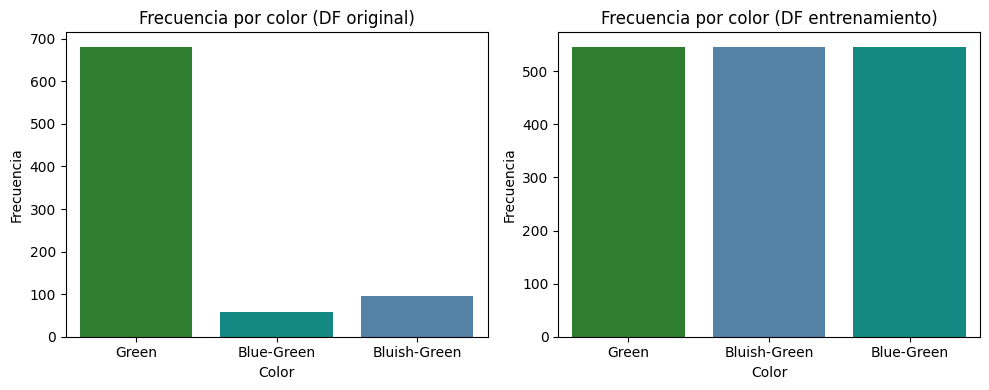

In [144]:
#@title Comparación antes y después del balance
colores = {'Green': '#228B22', 'Blue-Green': '#009D94', 'Bluish-Green': '#4682b4'}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Gráfico para el DF original
sns.countplot(x='Color', data=data, palette=colores, ax=axes[0])
axes[0].set_title('Frecuencia por color (DF original)')
axes[0].set_xlabel('Color'), axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')

# Gráfico para el DF de entrenamiento
sns.countplot(x='Color', data=df_smote, palette=colores, ax=axes[1])
axes[1].set_title('Frecuencia por color (DF entrenamiento)')
axes[1].set_xlabel('Color'), axes[1].set_ylabel('Frecuencia')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

# 2) SVM - Kernel lineal

El kernel lineal es adecuado cuando las instancias son linealmente separables en el espacio de características original.

## Conjuntos de Entrenamiento - Prueba

In [146]:
# Conjuntos de train y test
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']

In [147]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1638, 10), (1638,), (167, 10), (167,))

## Modelo

In [170]:
# Inicializa el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1,  random_state=42)

# Entrena el modelo en el conjunto de entrenamiento balanceado
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [171]:
# Realiza predicciones en el conjunto de prueba original
y_pred_svm_linear = svm_linear.predict(X_test)

In [166]:
# Evalúa el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear ))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear ))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear ))

Accuracy: 0.3473053892215569

Classification Report:
               precision    recall  f1-score   support

  Blue-Green       0.07      0.25      0.11        12
Bluish-Green       0.15      0.50      0.23        20
       Green       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167


Confusion Matrix:
 [[ 3  4  5]
 [ 5 10  5]
 [37 53 45]]


## Predicciones (c = 1)

In [198]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicc.': y_pred_svm_linear })
classification_table.sample(15)

,Actual,Predicc.
715,Green,Blue-Green
830,Green,Blue-Green
231,Green,Green
631,Green,Green
192,Green,Green
239,Green,Green
442,Green,Blue-Green
770,Bluish-Green,Green
616,Blue-Green,Green
357,Green,Green


## Hiperparámetros y Validación Cruzada

Parámetro C: 0.1
Validación Cruzada (Precisión): 0.5146770343850228
Conjunto de Prueba (Precisión): 0.7206130690683179
Conjunto de Prueba (Exhaustividad): 0.31736526946107785
Conjunto de Prueba (Exactitud): 0.31736526946107785
Conjunto de Prueba (F1-Score): 0.3757484884812492

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.08      0.33      0.13        12
Bluish-Green       0.16      0.60      0.25        20
       Green       0.86      0.27      0.42       135

    accuracy                           0.32       167
   macro avg       0.37      0.40      0.27       167
weighted avg       0.72      0.32      0.38       167



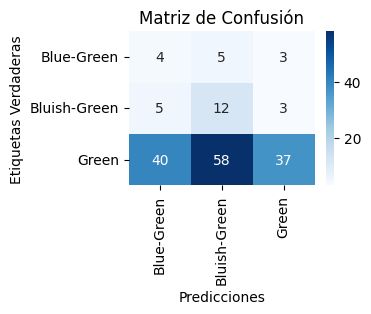



------
Parámetro C: 1
Validación Cruzada (Precisión): 0.5061329902289848
Conjunto de Prueba (Precisión): 0.6840695813258152
Conjunto de Prueba (Exhaustividad): 0.3473053892215569
Conjunto de Prueba (Exactitud): 0.3473053892215569
Conjunto de Prueba (F1-Score): 0.4180133381150584

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.07      0.25      0.11        12
Bluish-Green       0.15      0.50      0.23        20
       Green       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167



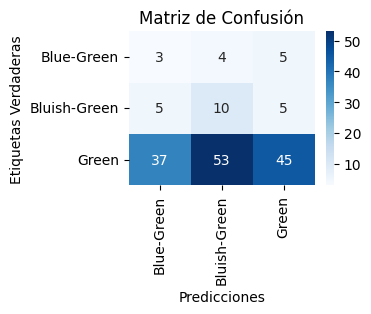



------
Parámetro C: 5
Validación Cruzada (Precisión): 0.5037014246289252
Conjunto de Prueba (Precisión): 0.6707150633797341
Conjunto de Prueba (Exhaustividad): 0.3413173652694611
Conjunto de Prueba (Exactitud): 0.3413173652694611
Conjunto de Prueba (F1-Score): 0.41354353204425703

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.07      0.25      0.11        12
Bluish-Green       0.14      0.45      0.21        20
       Green       0.80      0.33      0.47       135

    accuracy                           0.34       167
   macro avg       0.34      0.34      0.26       167
weighted avg       0.67      0.34      0.41       167



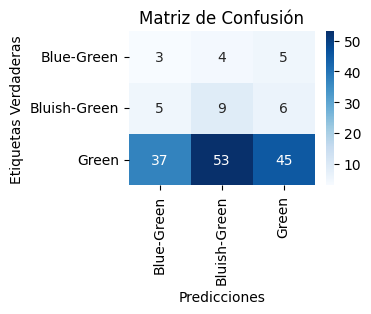



------
Parámetro C: 10
Validación Cruzada (Precisión): 0.5024819124338032
Conjunto de Prueba (Precisión): 0.6707150633797341
Conjunto de Prueba (Exhaustividad): 0.3413173652694611
Conjunto de Prueba (Exactitud): 0.3413173652694611
Conjunto de Prueba (F1-Score): 0.41354353204425703

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.07      0.25      0.11        12
Bluish-Green       0.14      0.45      0.21        20
       Green       0.80      0.33      0.47       135

    accuracy                           0.34       167
   macro avg       0.34      0.34      0.26       167
weighted avg       0.67      0.34      0.41       167



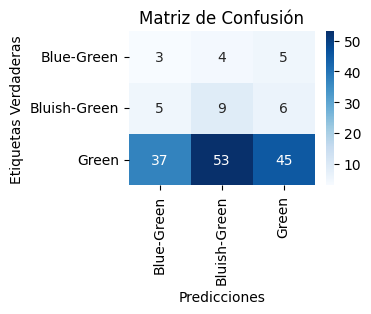



------


In [161]:
# Lista de valores para el parámetro de costo (C)
parametros_c = [0.1, 1, 5, 10]

# Validación cruzada para cada valor de C
for c in parametros_c:
    # Crear un clasificador SVM con kernel lineal y el valor de C actual
    svm_clf = SVC(kernel='linear', C=c,  random_state=42)
    scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    # Métricas en el conjunto de prueba
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Mostrar resultados
    print(f"Parámetro C: {c}")
    print(f"Validación Cruzada (Precisión): {scores.mean()}")
    print(f"Conjunto de Prueba (Precisión): {precision}")
    print(f"Conjunto de Prueba (Exhaustividad): {recall}")
    print(f"Conjunto de Prueba (Exactitud): {accuracy}")
    print(f"Conjunto de Prueba (F1-Score): {f1}")

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

    # Separador
    print("\n\n------")

## Conclusiones

**OBSERVACIONES SOBRE EL COSTO "C":**

**Parámetro C = 0.1**

La precisión obtenida en el conjunto de prueba es relativamente alta (0.7206), lo que indica que el modelo tiene una buena capacidad para predecir correctamente la clase.
Sin embargo, la exhaustividad (recall) es bastante baja (0.3174), lo que sugiere que el modelo tiende a perder algunas instancias de la clase positiva. La exactitud general y el F1-Score también son bajos, indicando un rendimiento general insatisfactorio.

**Parámetro C = 1**

La precisión en el conjunto de prueba disminuyó en comparación con C=0.1 (0.6841), pero aún se mantiene a un nivel razonable.
La exhaustividad mejoró ligeramente (0.3473) en comparación con C=0.1, pero sigue siendo baja.
La exactitud general y el F1-Score se mantienen bajos, indicando que el modelo aún tiene deficiencias en la clasificación.

**Parámetro C = 10**

La precisión en el conjunto de prueba sigue disminuyendo (0.6707), y la exhaustividad también sigue siendo baja (0.3413).
La exactitud general y el F1-Score siguen siendo bajos, lo que indica que el rendimiento general del modelo no mejora significativamente.

**CONCLUSIÓN:**

A medida que el parámetro de regularización C aumenta, la precisión en el conjunto de prueba tiende a disminuir, lo que podría indicar que el modelo está sobreajustando.
La baja exhaustividad sugiere que el modelo tiene dificultades para identificar todas las instancias de la clase positiva.
El bajo F1-Score también refleja la falta de equilibrio entre precisión y exhaustividad.

Podría ser beneficioso explorar otros tipos de kernels para mejorar el rendimiento del modelo. Se implementa a continuación.

# 3) SVM - Kernel gaussiano

Permite la clasificación no lineal al mapear las instancias en un espacio de características de mayor dimensión. Este kernel es especialmente útil cuando las instancias no son separables por un hiperplano en el espacio de características original.

## Conjuntos de Entrenamiento - Prueba

In [168]:
# Conjuntos de train y test
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']

In [169]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1638, 10), (1638,), (167, 10), (167,))

## Modelo

In [175]:
# Inicializa el modelo SVM con kernel gaussiano (rbf)
svm_gauss = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrena el modelo en el conjunto de entrenamiento balanceado
svm_gauss.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [177]:
# Realiza predicciones en el conjunto de prueba original
y_pred_svm_gauss = svm_gauss.predict(X_test)

In [178]:
# Evalúa el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear ))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear ))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear ))

Accuracy: 0.3473053892215569

Classification Report:
               precision    recall  f1-score   support

  Blue-Green       0.07      0.25      0.11        12
Bluish-Green       0.15      0.50      0.23        20
       Green       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167


Confusion Matrix:
 [[ 3  4  5]
 [ 5 10  5]
 [37 53 45]]


## Hiperparámetros y Validación Cruzada

Parámetro C: 0.1
Validación Cruzada (Precisión): 0.5769355560528082
Conjunto de Prueba (Precisión): 0.696636493209893
Conjunto de Prueba (Exhaustividad): 0.4251497005988024
Conjunto de Prueba (Exactitud): 0.4251497005988024
Conjunto de Prueba (F1-Score): 0.5053864336105116

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.03      0.08      0.04        12
Bluish-Green       0.16      0.45      0.24        20
       Green       0.84      0.45      0.59       135

    accuracy                           0.43       167
   macro avg       0.34      0.33      0.29       167
weighted avg       0.70      0.43      0.51       167



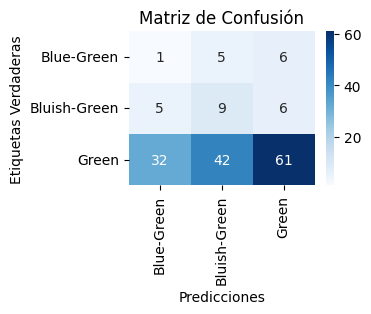



------
Parámetro C: 1
Validación Cruzada (Precisión): 0.6379913478033863
Conjunto de Prueba (Precisión): 0.6810094845274487
Conjunto de Prueba (Exhaustividad): 0.437125748502994
Conjunto de Prueba (Exactitud): 0.437125748502994
Conjunto de Prueba (F1-Score): 0.5098990556268651

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.04      0.08      0.05        12
Bluish-Green       0.14      0.45      0.21        20
       Green       0.82      0.47      0.59       135

    accuracy                           0.44       167
   macro avg       0.33      0.33      0.29       167
weighted avg       0.68      0.44      0.51       167



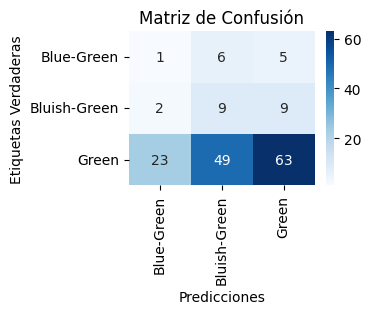



------
Parámetro C: 5
Validación Cruzada (Precisión): 0.6605765644812411
Conjunto de Prueba (Precisión): 0.6655303396065595
Conjunto de Prueba (Exhaustividad): 0.39520958083832336
Conjunto de Prueba (Exactitud): 0.39520958083832336
Conjunto de Prueba (F1-Score): 0.47257262333796296

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.04      0.08      0.05        12
Bluish-Green       0.12      0.40      0.18        20
       Green       0.80      0.42      0.55       135

    accuracy                           0.40       167
   macro avg       0.32      0.30      0.26       167
weighted avg       0.67      0.40      0.47       167



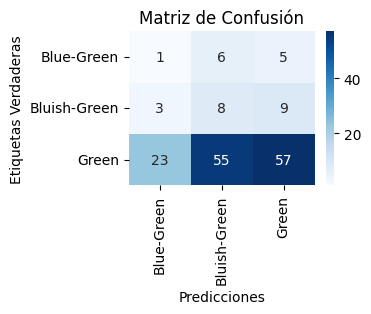



------
Parámetro C: 10
Validación Cruzada (Precisión): 0.6776758409785932
Conjunto de Prueba (Precisión): 0.6871096516644132
Conjunto de Prueba (Exhaustividad): 0.4550898203592814
Conjunto de Prueba (Exactitud): 0.4550898203592814
Conjunto de Prueba (F1-Score): 0.52885692030573

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.04      0.08      0.06        12
Bluish-Green       0.13      0.40      0.20        20
       Green       0.83      0.50      0.62       135

    accuracy                           0.46       167
   macro avg       0.33      0.33      0.29       167
weighted avg       0.69      0.46      0.53       167



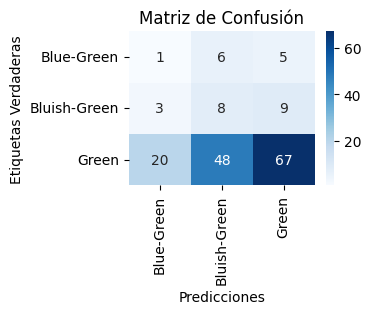



------
Parámetro C: 20
Validación Cruzada (Precisión): 0.692930931602894
Conjunto de Prueba (Precisión): 0.6919354653932669
Conjunto de Prueba (Exhaustividad): 0.49101796407185627
Conjunto de Prueba (Exactitud): 0.49101796407185627
Conjunto de Prueba (F1-Score): 0.5597869733970554

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.08      0.17      0.11        12
Bluish-Green       0.13      0.35      0.19        20
       Green       0.83      0.54      0.65       135

    accuracy                           0.49       167
   macro avg       0.35      0.35      0.32       167
weighted avg       0.69      0.49      0.56       167



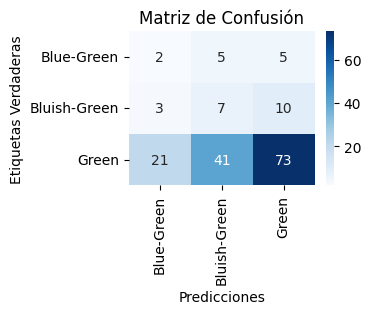



------
Parámetro C: 50
Validación Cruzada (Precisión): 0.7161333631684941
Conjunto de Prueba (Precisión): 0.6858017494638989
Conjunto de Prueba (Exhaustividad): 0.5029940119760479
Conjunto de Prueba (Exactitud): 0.5029940119760479
Conjunto de Prueba (F1-Score): 0.5738903916558923

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.06      0.17      0.09        12
Bluish-Green       0.08      0.15      0.10        20
       Green       0.83      0.59      0.69       135

    accuracy                           0.50       167
   macro avg       0.32      0.30      0.29       167
weighted avg       0.69      0.50      0.57       167



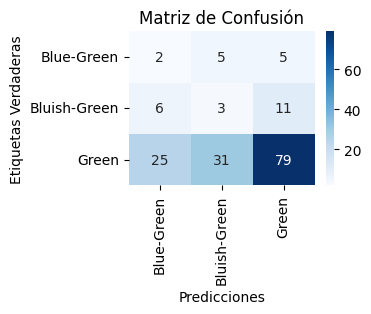



------
Parámetro C: 100
Validación Cruzada (Precisión): 0.7484858655926009
Conjunto de Prueba (Precisión): 0.6971604918505236
Conjunto de Prueba (Exhaustividad): 0.5449101796407185
Conjunto de Prueba (Exactitud): 0.5449101796407185
Conjunto de Prueba (F1-Score): 0.6068804941237292

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.06      0.17      0.09        12
Bluish-Green       0.09      0.15      0.12        20
       Green       0.84      0.64      0.73       135

    accuracy                           0.54       167
   macro avg       0.33      0.32      0.31       167
weighted avg       0.70      0.54      0.61       167



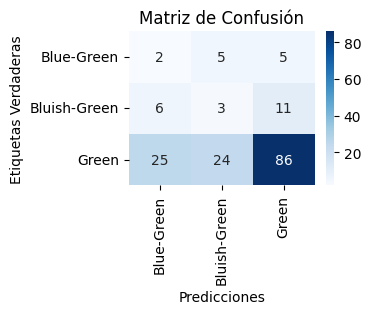



------
Parámetro C: 1000
Validación Cruzada (Precisión): 0.7820765271872901
Conjunto de Prueba (Precisión): 0.6933450608858414
Conjunto de Prueba (Exhaustividad): 0.5568862275449101
Conjunto de Prueba (Exactitud): 0.5568862275449101
Conjunto de Prueba (F1-Score): 0.6133825308425946

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.07      0.17      0.10        12
Bluish-Green       0.09      0.15      0.11        20
       Green       0.84      0.65      0.73       135

    accuracy                           0.56       167
   macro avg       0.33      0.32      0.31       167
weighted avg       0.69      0.56      0.61       167



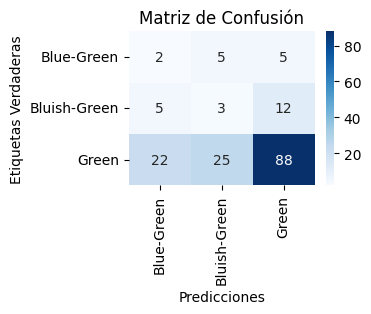



------


In [185]:
# Lista de valores para el parámetro de costo (C)
parametros_c = [0.1, 1, 5, 10, 20, 50, 100, 1000]

# Validación cruzada para cada valor de C en el modelo gaussiano
for c in parametros_c:
    # Inicializa el modelo SVM con kernel gaussiano y el valor de C actual
    svm_gaussiano = SVC(kernel='rbf', C=c, gamma='scale', random_state=42)
    scores = cross_val_score(svm_gaussiano, X_train, y_train, cv=5, scoring='accuracy')
    svm_gaussiano.fit(X_train, y_train)
    y_pred_svm_gaussiano = svm_gaussiano.predict(X_test)

    # Métricas en el conjunto de prueba
    precision = precision_score(y_test, y_pred_svm_gaussiano, average='weighted')
    recall = recall_score(y_test, y_pred_svm_gaussiano, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_svm_gaussiano)
    f1 = f1_score(y_test, y_pred_svm_gaussiano, average='weighted')

    # Mostrar resultados
    print(f"Parámetro C: {c}")
    print(f"Validación Cruzada (Precisión): {scores.mean()}")
    print(f"Conjunto de Prueba (Precisión): {precision}")
    print(f"Conjunto de Prueba (Exhaustividad): {recall}")
    print(f"Conjunto de Prueba (Exactitud): {accuracy}")
    print(f"Conjunto de Prueba (F1-Score): {f1}")

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_svm_gaussiano))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_svm_gaussiano)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_gaussiano.classes_, yticklabels=svm_gaussiano.classes_)
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

    # Separador
    print("\n\n------")

## Conclusiones

El aumento progresivo en el valor de C ha mejorado significativamente el rendimiento del modelo en términos de precisión, exhaustividad y F1-score. Parece estar encontrando un mejor equilibrio entre la precisión y la exhaustividad, lo que sugiere una mejora en la capacidad de clasificar correctamente tanto los casos positivos como los negativos.
Es posible que ajustar aún más los hiperparámetros, como γ, pueda mejorar aún más el rendimiento del modelo.

A continuación se realiza un grid search a modo experimental.

## Grid Search

Mejores hiperparámetros encontrados:
{'C': 5000, 'gamma': 10}

Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:
Precisión: 0.6540430949125371
Exhaustividad: 0.6167664670658682
Exactitud: 0.6167664670658682
F1-Score: 0.6347508545250466


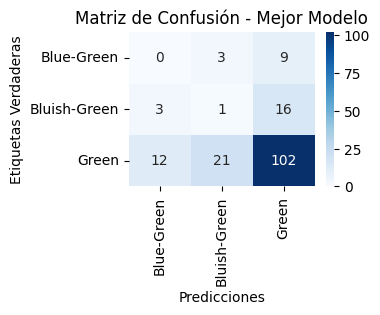

In [189]:
parametros_c = [0.1, 1, 10, 100, 1000, 5000, 10000]
gamma_options = ['scale', 'auto'] + [0.1, 1, 10, 20]  # opciones específicas de float

# Diccionario de parámetros para la cuadrícula
parametros_grid = {'C': parametros_c, 'gamma': gamma_options}

# Inicializa el modelo SVM con kernel gaussiano (rbf)
svm_gauss = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_gauss, parametros_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en la cuadrícula utilizando el conjunto de entrenamiento balanceado
grid_search.fit(X_train, y_train)
mejores_parametros = grid_search.best_params_

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(mejores_parametros)

# Obtiene el modelo con los mejores hiperparámetros
mejor_modelo = grid_search.best_estimator_

# Entrena el modelo con los mejores hiperparámetros en el conjunto de entrenamiento balanceado
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_mejor_modelo = mejor_modelo.predict(X_test)

# Evalúa el rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba
precision_mejor_modelo = precision_score(y_test, y_pred_mejor_modelo, average='weighted')
recall_mejor_modelo = recall_score(y_test, y_pred_mejor_modelo, average='weighted')
accuracy_mejor_modelo = accuracy_score(y_test, y_pred_mejor_modelo)
f1_mejor_modelo = f1_score(y_test, y_pred_mejor_modelo, average='weighted')

# Muestra las métricas de rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba
print("\nRendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:")
print(f"Precisión: {precision_mejor_modelo}")
print(f"Exhaustividad: {recall_mejor_modelo}")
print(f"Exactitud: {accuracy_mejor_modelo}")
print(f"F1-Score: {f1_mejor_modelo}")

# Matriz de Confusión para el mejor modelo
cm_mejor_modelo = confusion_matrix(y_test, y_pred_mejor_modelo)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_mejor_modelo, annot=True, fmt='d', cmap='Blues', xticklabels=mejor_modelo.classes_, yticklabels=mejor_modelo.classes_)
plt.title("Matriz de Confusión - Mejor Modelo")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()


## Predicciones (Mejor modelo)

In [203]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicc.': y_pred_mejor_modelo})
classification_table.sample(15)

,Actual,Predicc.
625,Green,Green
693,Green,Green
631,Green,Green
830,Green,Blue-Green
49,Green,Green
599,Blue-Green,Bluish-Green
539,Green,Bluish-Green
623,Green,Green
653,Blue-Green,Green
465,Green,Green


## Conclusiones generales para los modelos SVM

En comparación con el kernel gaussiano anterior (con C=100), se observa un rendimiento ligeramente mejor con los nuevos hiperparámetros. La precisión y la exhaustividad han mejorado, indicando una mejor capacidad para clasificar correctamente tanto los casos positivos como los negativos.

En relación con el kernel lineal, el modelo con kernel gaussiano tiene un rendimiento comparable en términos de precisión, pero muestra una mayor exhaustividad y F1-Score. Esto sugiere que el modelo gaussiano es más efectivo para capturar casos positivos.

El rendimiento del modelo puede estar afectado por la naturaleza desbalanceada de la distribución de clases del conjunto de datos de testeo.

# 4) Random Forest

Se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la combinación de sus predicciones para obtener un resultado más robusto y generalizable.

Algunas hipótesis que lo harían más eficiente que los modelos anteriores de SVM:

* Random Forest puede manejar conjuntos de datos complejos y no lineales de manera efectiva. Si el conjunto de datos de características de café tiene relaciones no lineales o interacciones complejas entre las características, Random Forest podría ser más capaz de capturar estas complejidades.

* Random Forest es conocido por ser robusto frente a datos ruidosos y atípicos. Hay valores atípicos en el conjunto de datos de café, Random Forest puede manejarlos mejor que SVM, que es más sensible a puntos extremos.

* El muestreo aleatorio y la selección aleatoria de características en Random Forest ayudan a reducir el riesgo de sobreajuste. Esto podría ser beneficioso si el conjunto de datos no es extremadamente grande y hay preocupaciones sobre el sobreajuste.

* Random Forest puede manejar naturalmente conjuntos de datos desbalanceados debido a la votación de árboles. Si las clases de colores de café no están balanceadas, Random Forest podría adaptarse mejor.

* Random Forest proporciona información sobre la importancia de las características, lo que puede ser útil para entender qué características contribuyen más a las predicciones.

## Conjuntos de Entrenamiento - Prueba

Dataframe de entrenamiento sin balancear

In [264]:
# Conjuntos de train (SIN BALANCEAR) y test
# X_train = df_train.drop('Color', axis=1)
# y_train = df_train['Color']

# X_test = df_test.drop('Color', axis=1)
# y_test = df_test['Color']

In [265]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 10), (668,), (167, 10), (167,))

Dataframe de entrenamiento balanceado

In [270]:
# Conjuntos de train (BALANCEADO) y test
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']

In [271]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1638, 10), (1638,), (167, 10), (167,))

## Modelo

In [272]:
# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento balanceado
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [273]:
# Realizar predicciones en el conjunto de prueba original
y_pred_rf = rf.predict(X_test)

In [274]:
# Evalúa el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7005988023952096

Classification Report:
               precision    recall  f1-score   support

  Blue-Green       0.08      0.08      0.08        12
Bluish-Green       0.11      0.10      0.11        20
       Green       0.83      0.84      0.84       135

    accuracy                           0.70       167
   macro avg       0.34      0.34      0.34       167
weighted avg       0.69      0.70      0.70       167


Confusion Matrix:
 [[  1   4   7]
 [  2   2  16]
 [  9  12 114]]


## Grid Search - Hiperparámetros - Validación Cruzada

In [275]:
# Lista de valores para los hiperparámetros de Random Forest
parametros_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, parametros_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrena el modelo con la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Obtiene el mejor modelo con los mejores hiperparámetros
best_rf = grid_search_rf.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Mostrar resultados
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")
print(f"Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:")
print(f"Precisión: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:
Precisión: 0.7065868263473054

Classification Report:
              precision    recall  f1-score   support

  Blue-Green       0.09      0.08      0.09        12
Bluish-Green       0.12      0.10      0.11        20
       Green       0.83      0.85      0.84       135

    accuracy                           0.71       167
   macro avg       0.35      0.35      0.34       167
weighted avg       0.69      0.71      0.70       167


Confusion Matrix:
[[  1   4   7]
 [  1   2  17]
 [  9  11 115]]


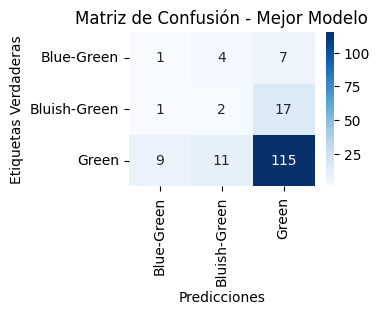

In [276]:
# Matriz de Confusión para el mejor modelo
cm_mejor_modelo = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_mejor_modelo, annot=True, fmt='d', cmap='Blues', xticklabels=mejor_modelo.classes_, yticklabels=mejor_modelo.classes_)
plt.title("Matriz de Confusión - Mejor Modelo")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

## Predicciones (Mejor modelo)

In [277]:
# Crear una tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
classification_table.sample(15)

,Actual,Predicted
433,Green,Bluish-Green
751,Green,Green
96,Green,Green
31,Green,Green
704,Green,Green
744,Green,Green
623,Green,Green
362,Bluish-Green,Bluish-Green
548,Green,Green
453,Green,Green


## Visualización del modelo

### Árbol Principal

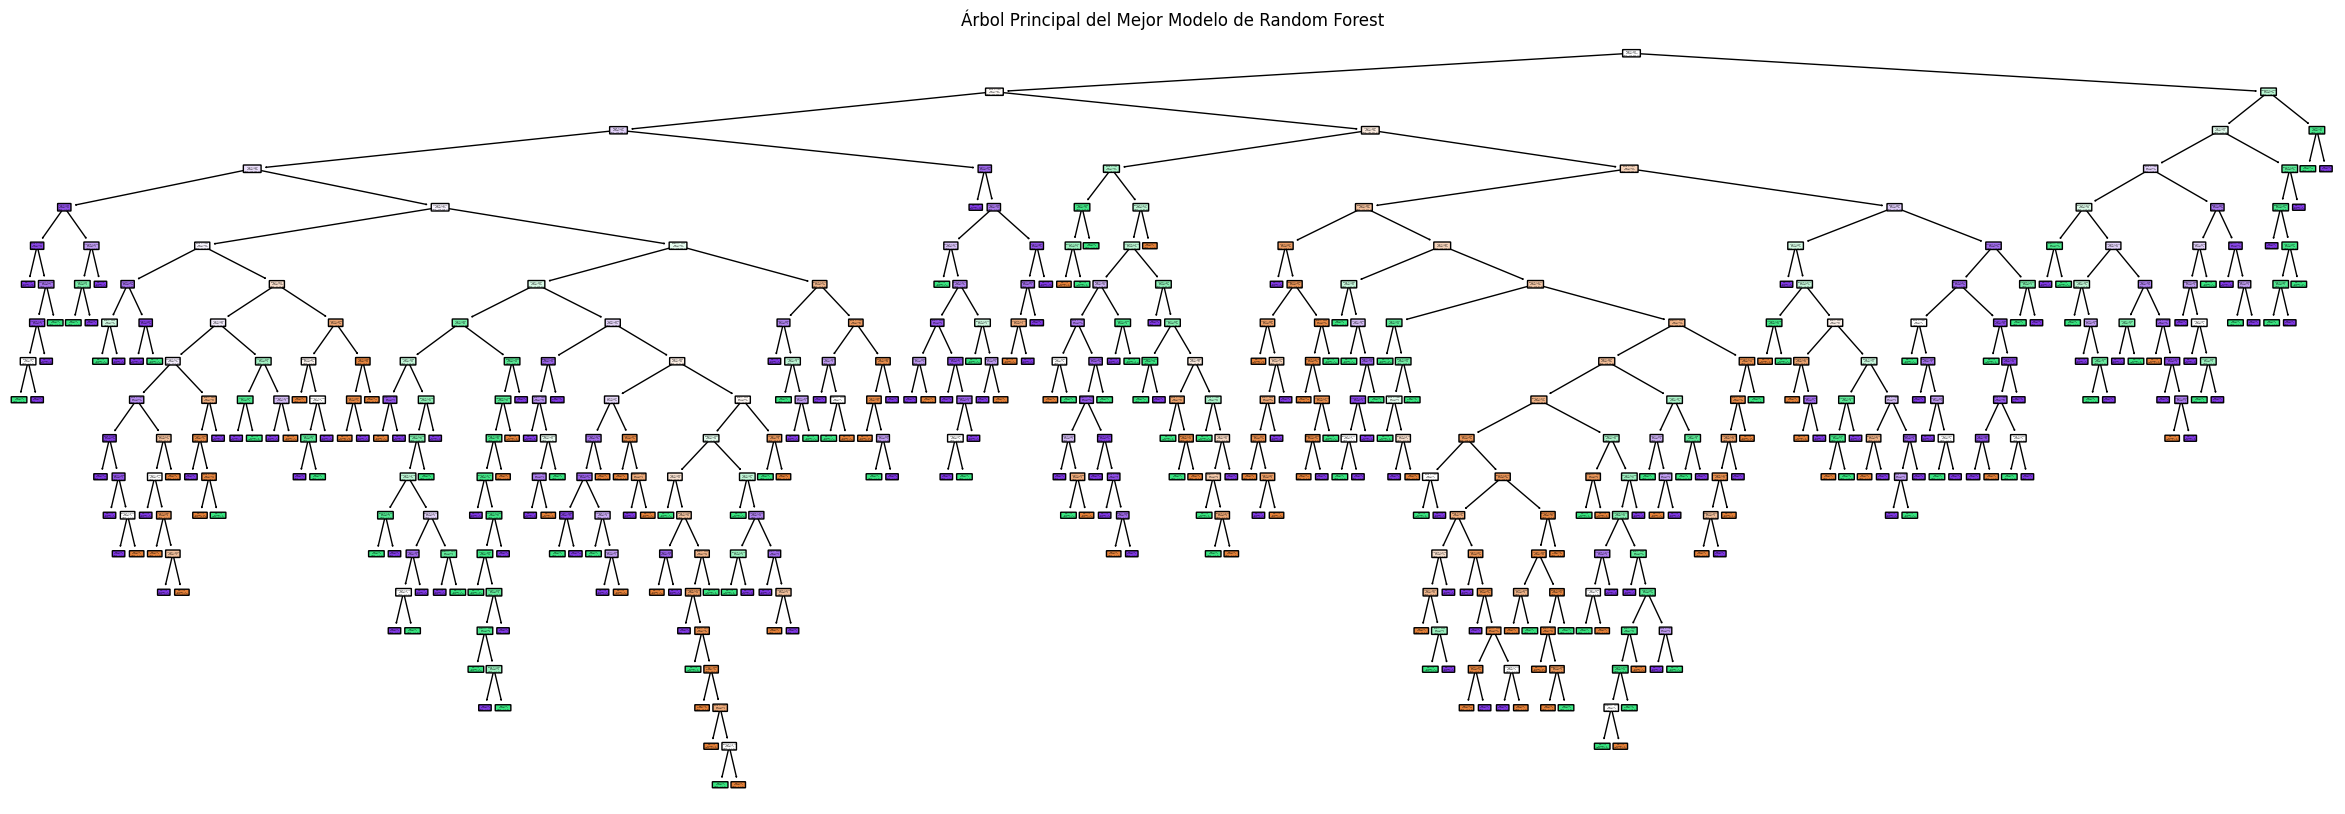

In [278]:
# Graficar el árbol principal del mejor modelo de Random Forest
plt.figure(figsize=(30, 10))
plot_tree(best_rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=best_rf.classes_, rounded=True)
plt.title("Árbol Principal del Mejor Modelo de Random Forest")
plt.show()

### Primeros "n" árboles

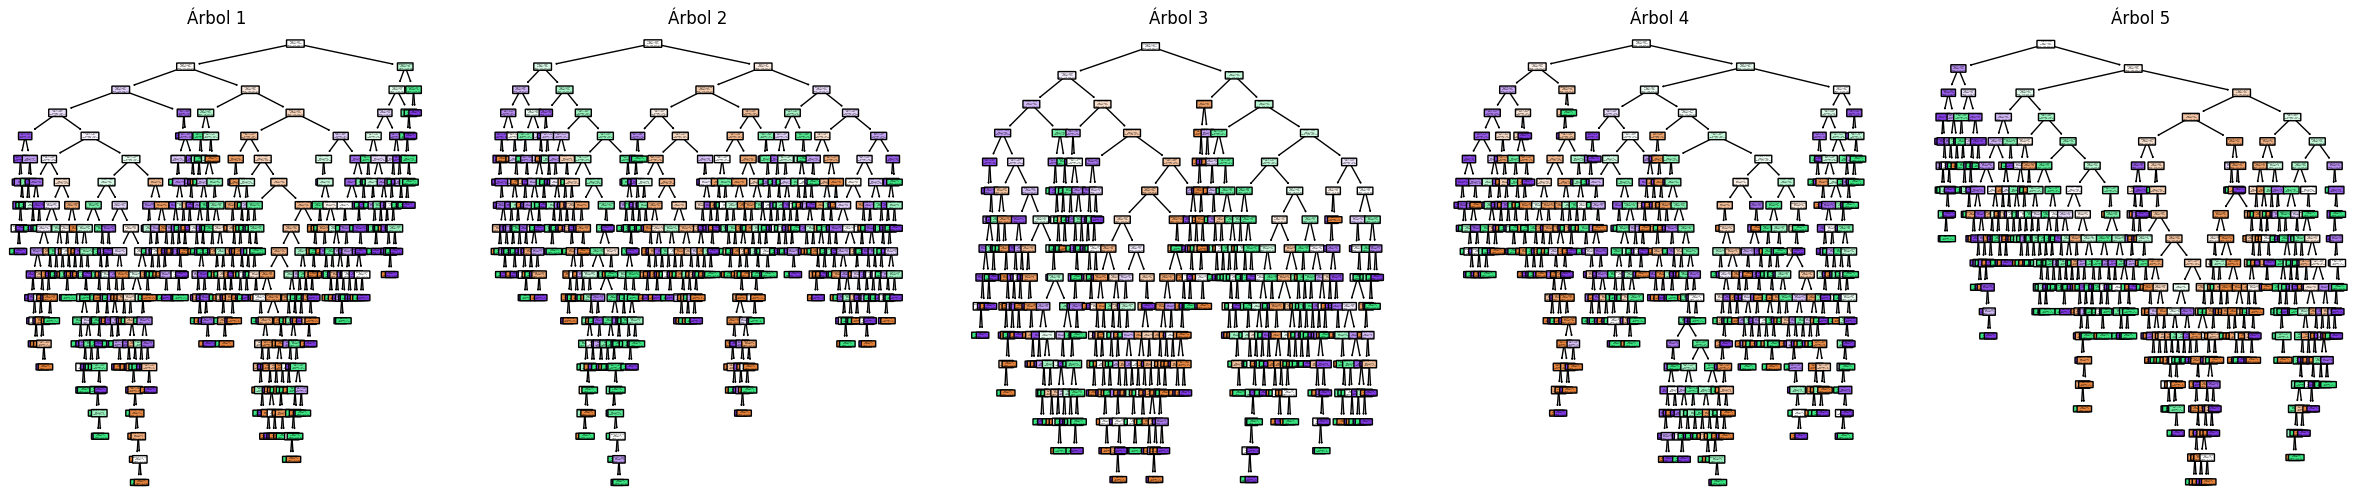

In [279]:
num_arboles = 5
# Cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=num_arboles, figsize=(30, 6))

# Mostrar los primeros 'num_arboles' árboles del bosque
for i in range(num_arboles):
    plot_tree(best_rf.estimators_[i], filled=True, feature_names=X_train.columns, class_names=best_rf.classes_, rounded=True, ax=axes[i])
    axes[i].set_title(f"Árbol {i + 1}")

plt.show()

### Exportado de PDF

Para una mejor lectura de los valores de cada nodo.

In [258]:
# Árbol principal del Random Forest (se puede ajustar el índice)
arbol_principal = best_rf.estimators_[0]
# Exporta el árbol a formato DOT
dot_data = export_graphviz(arbol_principal, filled=True, feature_names=X_train.columns, class_names=best_rf.classes_, rounded=True, special_characters=True, out_file=None)

# Crea y muestra el gráfico utilizando Graphviz
graph = graphviz.Source(dot_data)
graph.render(filename='arbol_principal', format='png', cleanup=True)  # Opcional: renderiza a un archivo PNG
graph.view()  # Abre el visor de Graphviz con el árbol

'arbol_principal.pdf'

## Comparaciones de RF en datos balanceados o sin balancear

Lo que sucede en esta comparación, parece ser que se debe al gran desbalance de los datos en el conjunto.

Usando los datos de entrenamiento sin balancear, el modelo parece predecir todos los datos como la clase mayoritaria (color verde) y como el conjunto de test tiene el mismo desbalance, predice que todo será verde, aunque pierda a los otros dos colores.

Al usar los datos de entrenamiento balanceados, el modelo final captura, al menos, algunos de los otros dos colores, a costa de intentar predecirlos y reducir las métricas.

### Modelo base

Sin balancear



```
Accuracy: 0.7964071856287425

Classification Report:
               precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.82      0.99      0.90       135

    accuracy                           0.80       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.66      0.80      0.72       167


Confusion Matrix:
 [[  0   3   9]
 [  0   0  20]
 [  0   2 133]]
```



Balanceado



```
Accuracy: 0.7005988023952096

Classification Report:
               precision    recall  f1-score   support

  Blue-Green       0.08      0.08      0.08        12
Bluish-Green       0.11      0.10      0.11        20
       Green       0.83      0.84      0.84       135

    accuracy                           0.70       167
   macro avg       0.34      0.34      0.34       167
weighted avg       0.69      0.70      0.70       167


Confusion Matrix:
 [[  1   4   7]
 [  2   2  16]
 [  9  12 114]]
```



### Mejores Hiperparámetros

Sin balancear



```
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:
Precisión: 0.8083832335329342

Classification Report:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167


Confusion Matrix:
[[  0   0  12]
 [  0   0  20]
 [  0   0 135]]
```



Balanceado



```
Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:
Precisión: 0.7065868263473054

Classification Report:
              precision    recall  f1-score   support

  Blue-Green       0.09      0.08      0.09        12
Bluish-Green       0.12      0.10      0.11        20
       Green       0.83      0.85      0.84       135

    accuracy                           0.71       167
   macro avg       0.35      0.35      0.34       167
weighted avg       0.69      0.71      0.70       167


Confusion Matrix:
[[  1   4   7]
 [  1   2  17]
 [  9  11 115]]
```



# Conclusiones y observaciones finales

En este análisis, exploramos la aplicación de diversos modelos de clasificación, incluyendo Support Vector Machines (SVM) con kernel lineal y gaussiano, así como Random Forest, para abordar la tarea de predecir el color de los granos de café en función de sus características específicas. El objetivo principal fue lograr un modelo preciso y robusto que pudiera generalizar bien a datos no vistos.

Uno de los aspectos fundamentales que abordamos fue el manejo de los datos desbalanceados en las clases de la variable objetivo, "Color". Implementamos técnicas de preprocesamiento, como el sobremuestreo (SMOTE), para generar datos sintéticos y contrarrestar el desbalanceo en las clases. Este enfoque resultó esencial para mejorar la capacidad predictiva de los modelos, especialmente en escenarios donde ciertos colores tenían menos representación en el conjunto de datos original.

Durante la optimización de hiperparámetros, observamos que la selección cuidadosa de parámetros, como el término de penalización (C) en SVM y los valores de los hiperparámetros en Random Forest, contribuyó significativamente al rendimiento del modelo. En particular, encontramos que el modelo de ensamble, después de la búsqueda exhaustiva de hiperparámetros, demostró ser especialmente efectivo para este problema de clasificación de colores de granos de café con las características actuales del conjunto de datos.

A lo largo de nuestras iteraciones, evaluamos el rendimiento de los modelos utilizando métricas clave como precisión, exhaustividad, exactitud y F1-score. La visualización de resultados mediante matrices de confusión proporcionó una comprensión más profunda de la capacidad de los modelos para clasificar correctamente los diferentes colores de café.

En resumen, al abordar este problema real de clasificación de colores de granos de café, la combinación de estrategias de preprocesamiento de datos, optimización de hiperparámetros y la elección adecuada de modelos condujo a un rendimiento mejorado y una mayor capacidad de generalización.